# Final Project Submission - Phase 04

Student Name: GROUP 4

Members : Edward Opollo,Sharon Kimutai,Daniel Ndirangu,Vivian Waitiri,Jackson Maina,Rahma Mohamed,Cynthia Karuga

Student pace: Part Time

Scheduled Project due date: 30th August 2023

# OVERVIEW

This project involves building a time series model using Zillow data to aid real estate investors in making informed investment decisions. The dataset comprises property information, and the project encompasses data preprocessing, time series transformation, exploratory data analysis, model selection, training, and evaluation. The model's objective is to forecast property price trends, which will be presented to investors through a user-friendly interface. Recommendations on where to invest will be provided based on these predictions and supplemented with additional insights from EDA. The project also includes documentation, deployment, maintenance, and a feedback loop to continuously enhance the model's accuracy and relevance to real estate investment needs.

# BUSINESS UNDERSTANDING

This project will significantly enhance business understanding for real estate investors by leveraging time series analysis of Zillow data. It will provide investors with historical property price trends, helping them make data-driven investment decisions, manage risks, identify promising locations, and access forecasts through a user-friendly interface. The project's continuous improvement approach, including a feedback loop and regular updates, ensures that investors stay well-informed in a dynamic real estate market, ultimately empowering them to optimize their investments and improve their overall understanding of the industry.Key factors will be considered like pricing of houses,location and risk to recommend for 'BEST INVESTMENT'


# DATA UNDERSTANDING AND PREPARATION

For data understanding and preparation, begin by thoroughly exploring the Zillow dataset, checking for missing values, and addressing outliers. Convert categorical variables like 'City,' 'State,' and 'Metro' into numerical format, possibly using one-hot encoding. Transform the dataset into a time series format, with 'RegionName' representing unique properties or regions and 'Date' as the time dimension. Calculate relevant time-based features, such as moving averages or seasonality patterns, to capture temporal trends. Additionally, split the data into training and testing sets, reserving the most recent data for validation. This will create a clean, structured dataset ready for time series modeling and forecasting.

# PROJECT OBJECTIVE

The project's main objective is to develop a time series forecasting model using Zillow data to assist real estate investors in making informed decisions about where to invest their capital. This model will provide predictions and insights into property price trends over time, helping investors identify regions and cities with potential for price appreciation. Ultimately, the project aims to empower investors with data-driven tools that enhance their understanding of real estate market dynamics, enabling them to make more strategic and profitable investment choices. The key question being:What are the top 5 best zip codes for us to invest in

# DATA UNDERSTANDING

In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import warnings
warnings.simplefilter('ignore')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib inline
#Time series analysis tools.
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
#importing the data and looking at the first 5 rows
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
#looking at the last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


#Column Names for Zillow DataSet

RegionID: A unique identifier for each region(zip code).

RegionName: The specific zip code for the region.

City: The city in which the zip code is located.

State: The state in which the zip code is located.

Metro: The metropolitan area to which the region belongs.

CountyName: The county in which the zip code is located.

SizeRank: A numerical rank representing the size of the zip code.

1996-04 to 2018-04: Median housing sales values for each month, spanning from April 1996 to April 2018.

In [4]:
#Analyse the dataframe
def analyze_dataset(df):

    # confirm type of df
    print(type(df))


    # Dataset shape
    print("Shape of the dataset:", df.shape,'\n')


    # Missing values
    null_counts = df.isnull().sum()
    print("Null columns only:", null_counts[null_counts > 0])


    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]),'\n')


    # Number of columns
    num_columns = len(df.columns)
    print("Number of columns:", num_columns)


    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')


    # Dataset information
    print("Information about the dataset:")
    print(df.info())


    # Distribution
    display(df.describe())

analyze_dataset(df)

<class 'pandas.core.frame.DataFrame'>
Shape of the dataset: (14723, 272) 

Null columns only: Metro      1043
1996-04    1039
1996-05    1039
1996-06    1039
1996-07    1039
           ... 
2014-02      56
2014-03      56
2014-04      56
2014-05      56
2014-06      56
Length: 220, dtype: int64
Number of duplicates: 0 

Number of columns: 272
The unique values per column are:
RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
              ...  
2017-12        5248
2018-01        5276
2018-02        5303
2018-03        5332
2018-04        5310
Length: 272, dtype: int64 

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB
None


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [5]:
#Create a copy of the dataframe
df2 = df.copy()
df2.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


#Summary of Dataframe

* This dataset contains information about median housing
sales values for various zip codes over a span of 22 years, from April 1996 to April 2018.

* There are 272 columns and 14723 rows indexed from 0 to 14722. This means there are 272 different variables each with 14723 records.
* The first 7 columns are named , **RegionID, RegionName, City, State, Metro, CountyName, SizeRank** while the other 265 columns are dates from **April 1996 to April 2018.**

* Data attributes:
 * RegionID: A unique index for each region (zip code) ranging from 58196 to 753844.
 *RegionName: A unique zip code for each region, ranging from 1001 to 99901.
 *SizeRank: A numerical rank representing the size of each zip code, ranked from 1 to 14723.
 *1996-04 to 2018-04: Median housing sales values for each month, covering a total of 265 data points for each zip code.

* Summary Statistics:
 * The median (50th percentile) size rank is approximately 46106, indicating the middle-sized zip code in the dataset.
 * The median housing sales value across all zip codes ranges from around USD11,300 to USD 3,849,600.
 * The mean (average) housing sales value across all zip codes ranges from approximately USD 118,299 to USD 288,039.
 * The standard deviation indicates the variability in housing sales values, with values ranging from around USD 42,500 to USD 372,054.
* There are three main data types in our dataset:
 * 219 columns with the floating numbers data type
 * 49 columns with the integer data type.
 * 4 columns with the object data type.
 * There are 220 columns with missing values. One being Metro, which is a categorical column and the numerical columns which are represented by dates.
No duplicates were identified in any of the columns.

The dataset consumes approximately 30.6 megabytes of memory.

In [6]:
#Converting column names to datetime
def get_datetimes(df2):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """

    return pd.to_datetime(df2.columns.values[7:], format='%Y-%m')

#Data Preparation and Cleaning

During this stage, the data undergoes cleaning and preparation to ensure its quality and reliability for subsequent analysis. The process begins by:


1.   ROI as our meassure of best zipcodes to invest.
2. Compare all zip codes and select the best 5 based on ROI
3. Evaluate each individual zip code to determine trends and seasonality
4. Detecting and addressing any missing values present
5. Detrend the data using one of the several options




In [7]:
# Making a dataframe of just New York
df_ny = df2[df2['State'] == 'NY']

# Seeing how many rows we get
print(df_ny.shape)

# Sanity check
df_ny.head()

(1015, 272)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300


In [8]:
# Checking our dataframe for NaN values
print(f'There are {df_ny.isna().sum().sum()} NaNs in our original dataframe')

# Backfilling that single NaN
df_ny.fillna(method='ffill', inplace=True)

# Sanity check
print(f'There are {df_ny.isna().sum().sum()} NaNs after using forwardfill')

There are 4012 NaNs in our original dataframe
There are 0 NaNs after using forwardfill


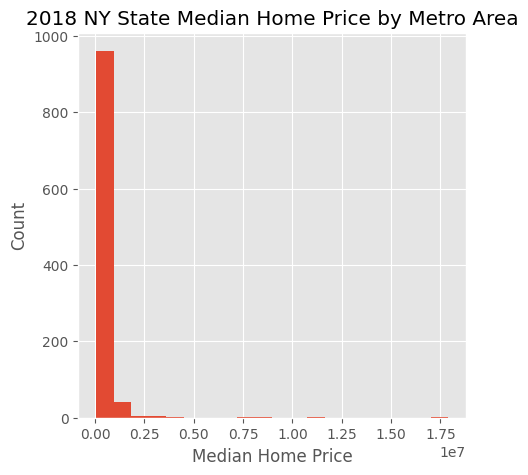

In [9]:
# Getting a list of the values for the last date in our time series
current_median_msa_home_prices = list(df_ny['2018-04'])

# Plotting the results
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(current_median_msa_home_prices, bins=20)
plt.title('2018 NY State Median Home Price by Metro Area')
plt.xlabel('Median Home Price')
plt.ylabel('Count')
plt.show()

# Zipcode Selection
In order to determine the best States to focus on for the real estate investment, we consider the below:

1. Calculating the **Return on Investment**(ROI) in percentage.

 ROI = (Final Value/Intial Value) - 1

2. Reviewing the Risk Assessment/ Volatility.

   This helps us understand the volatility in housing prices by utilising **standard deviation** and **mean** to calculate the **coefficient of variance**

In [10]:
# Assuming historical return on investment for 'df_ny'
df_ny['ROI'] = (df_ny['2018-04'] / df_ny['1996-04']) - 1

# Calculate standard deviation of monthly values for 'df_ny'
df_ny['std'] = df_ny.loc[:, '1996-04':'2018-04'].std(skipna=True, axis=1)

# Calculate historical mean value for  'df_ny'
df_ny['mean'] = df_ny.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1)

# Calculate coefficient of variance for 'df_ny'
df_ny['CV'] = df_ny['std'] / df_ny['mean']

# Show calculated values
df_ny[['RegionName', 'std', 'mean', 'ROI', 'CV']].head()


,RegionName,std,mean,ROI,CV
6,10467,8.569914e+04,2.923392e+05,1.733159,0.293150
10,11226,2.080187e+05,4.614242e+05,4.945679,0.450819
12,11375,2.240221e+05,6.081170e+05,3.297147,0.368387
13,11235,1.665122e+05,4.771932e+05,3.284514,0.348941
20,10011,4.193280e+06,4.801772e+06,59.253543,0.873278


In [11]:
# Define upper limit of CV according to risk profile for 'best5'.
upper_cv = df_ny['CV'].quantile(0.4)
print(f'\nCV upper limit: {upper_cv}')
# Get the 5 regionname with highest ROIs within the firm's risk profile for 'best5'.
RN_best5 = df_ny[df_ny['CV'] < upper_cv].sort_values('ROI', ascending=False).head(5)
print('\nBest 5 RegionName:')
print(RN_best5[['RegionName', 'ROI', 'CV']])


CV upper limit: 0.23863326394450965

Best 5 RegionName:
       RegionName       ROI        CV
14116       14065  1.660714  0.223623
12946       13040  1.566396  0.226185
8576        11771  1.501795  0.237330
11925       13491  1.410023  0.218232
12982       12154  1.377880  0.232964


In [12]:
RN_best5.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
14116,63398,14065,Freedom,NY,Olean,Cattaraugus,14117,39200.0,39700.0,40100.0,...,99500,100400,101700,103000,103800,104300,1.660714,15833.456790,70804.150943,0.223623
12946,62914,13040,Cincinnatus,NY,Cortland,Cortland,12947,36900.0,37200.0,37600.0,...,91700,92700,93600,93900,94100,94700,1.566396,15828.431937,69980.000000,0.226185
8576,62245,11771,Oyster Bay,NY,New York,Nassau,8577,334200.0,334400.0,334600.0,...,821200,820400,820600,822700,829200,836100,1.501795,153623.803098,647299.245283,0.237330
11925,63155,13491,Winfield,NY,Utica,Herkimer,11926,43900.0,44000.0,44200.0,...,103500,104200,105200,105500,105300,105800,1.410023,16931.938595,77586.792453,0.218232
12982,62431,12154,Schaghticoke,NY,Albany,Rensselaer,12983,86800.0,87600.0,88400.0,...,196800,198400,199100,200900,204100,206400,1.377880,35243.116639,151281.509434,0.232964


In [13]:
RN_best5.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,62828.600000,12904.200000,12110.000000,108200.000000,108580.00000,108980.000000,109320.000000,109700.000000,110040.000000,110460.000000,...,262540.000000,263220.000000,264040.000000,265200.000000,267300.00000,269460.000000,1.503362,47492.149412,203390.339623,0.227667
std,483.921791,943.023701,2121.714637,127977.673834,127911.07067,127831.850491,127725.612154,127651.106537,127650.471993,127721.701367,...,315231.982832,314454.276485,314090.135152,314681.330873,317293.37371,320023.800677,0.115318,59901.496279,250486.723867,0.007566
min,62245.000000,11771.000000,8577.000000,36900.000000,37200.00000,37600.000000,38000.000000,38400.000000,38800.000000,39200.000000,...,91700.000000,92700.000000,93600.000000,93900.000000,94100.00000,94700.000000,1.377880,15828.431937,69980.000000,0.218232
25%,62431.000000,12154.000000,11926.000000,39200.000000,39700.00000,40100.000000,40500.000000,40900.000000,41300.000000,41700.000000,...,99500.000000,100400.000000,101700.000000,103000.000000,103800.00000,104300.000000,1.410023,15833.456790,70804.150943,0.223623
50%,62914.000000,13040.000000,12947.000000,43900.000000,44000.00000,44200.000000,44300.000000,44500.000000,44500.000000,44600.000000,...,103500.000000,104200.000000,105200.000000,105500.000000,105300.00000,105800.000000,1.501795,16931.938595,77586.792453,0.226185
75%,63155.000000,13491.000000,12983.000000,86800.000000,87600.00000,88400.000000,89100.000000,89800.000000,90400.000000,91100.000000,...,196800.000000,198400.000000,199100.000000,200900.000000,204100.00000,206400.000000,1.566396,35243.116639,151281.509434,0.232964
max,63398.000000,14065.000000,14117.000000,334200.000000,334400.00000,334600.000000,334700.000000,334900.000000,335200.000000,335700.000000,...,821200.000000,820400.000000,820600.000000,822700.000000,829200.00000,836100.000000,1.660714,153623.803098,647299.245283,0.237330


In [14]:
RN_best5['location'] = RN_best5['City'] + ", " + RN_best5['State']

In [15]:
best_5_RN_with_location = RN_best5[['RegionName','location']]
print(best_5_RN_with_location)

       RegionName          location
14116       14065       Freedom, NY
12946       13040   Cincinnatus, NY
8576        11771    Oyster Bay, NY
11925       13491      Winfield, NY
12982       12154  Schaghticoke, NY


In [16]:
RN_best5.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', 'ROI', 'std',
       'mean', 'CV', 'location'],
      dtype='object', length=277)

* The "Best 5 RN" section presents the top 5 zip codes namely: **Freedom, NY:14065, Cincinnatus, NY:13040,Oyster Bay, NY:11771,Winfield, NY:13491,12154  Schaghticoke, NY:12154** They have been identified as the prime investment locations offering highest Return on Investment (ROI) while adhering to the risk profile's CV upper limit.
* The descriptive statistics of CV values indicate that the variability in median housing sales values across the selected zip codes is quite significant.The CV upper limit based on the risk profile is approximately 0.24. This limit helps define a threshold for selecting zip codes with acceptable levels of risk.
For these top 5 zip codes, the ROIs range from 137.79% to 166.0%, indicating substantial growth in median housing sales values over the specified time period.


EDA

### Univariate analysis

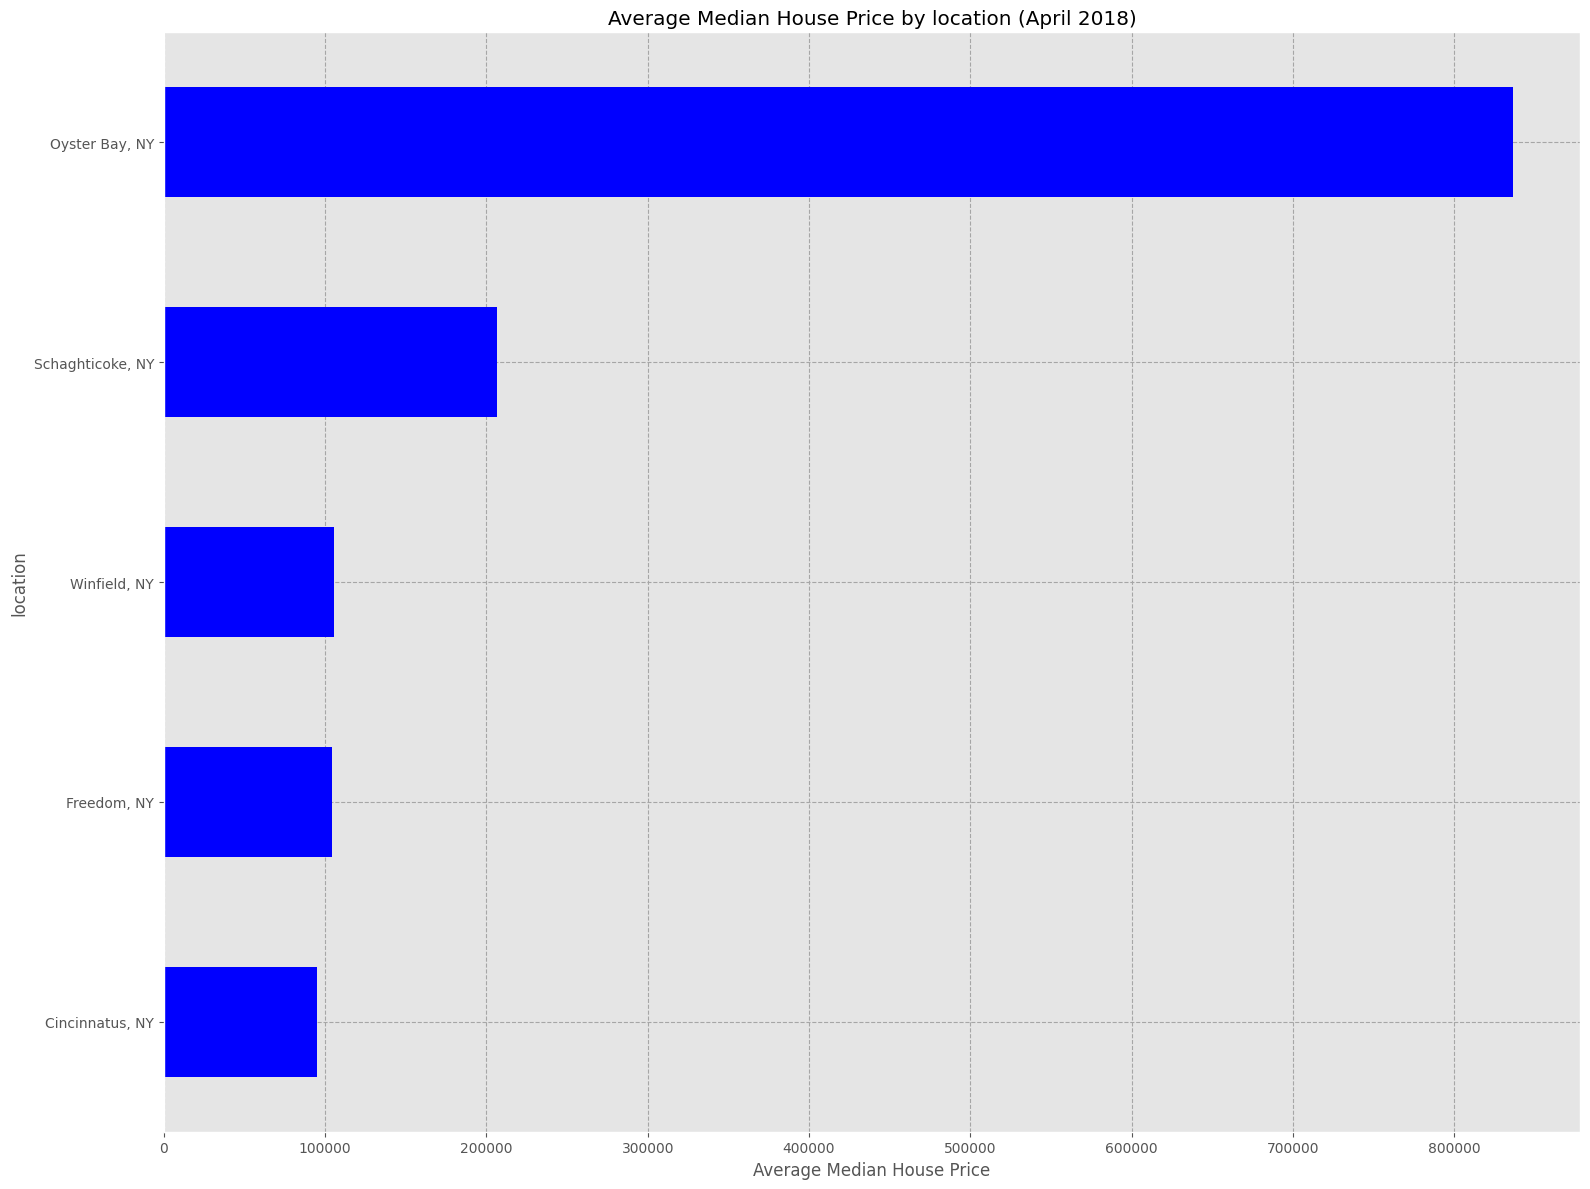

In [18]:
# Calculating the average median house price for each state in April 2018
locationprice = RN_best5.groupby('location')['2018-04'].mean().sort_values()

# Plotting the average median house price by state for April 2018
plt.figure(figsize=(16, 12))
locationprice.plot(kind='barh', color='blue')
plt.title('Average Median House Price by location (April 2018)')
plt.xlabel('Average Median House Price')
plt.ylabel('location')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

Average median house price for each state

It is noticeable that Oyester Bay,NY emerges with the highest value, standing at around USD 825,000.
Cincinnatus, NY exhibits the lowest average median property price at USD 95,000.

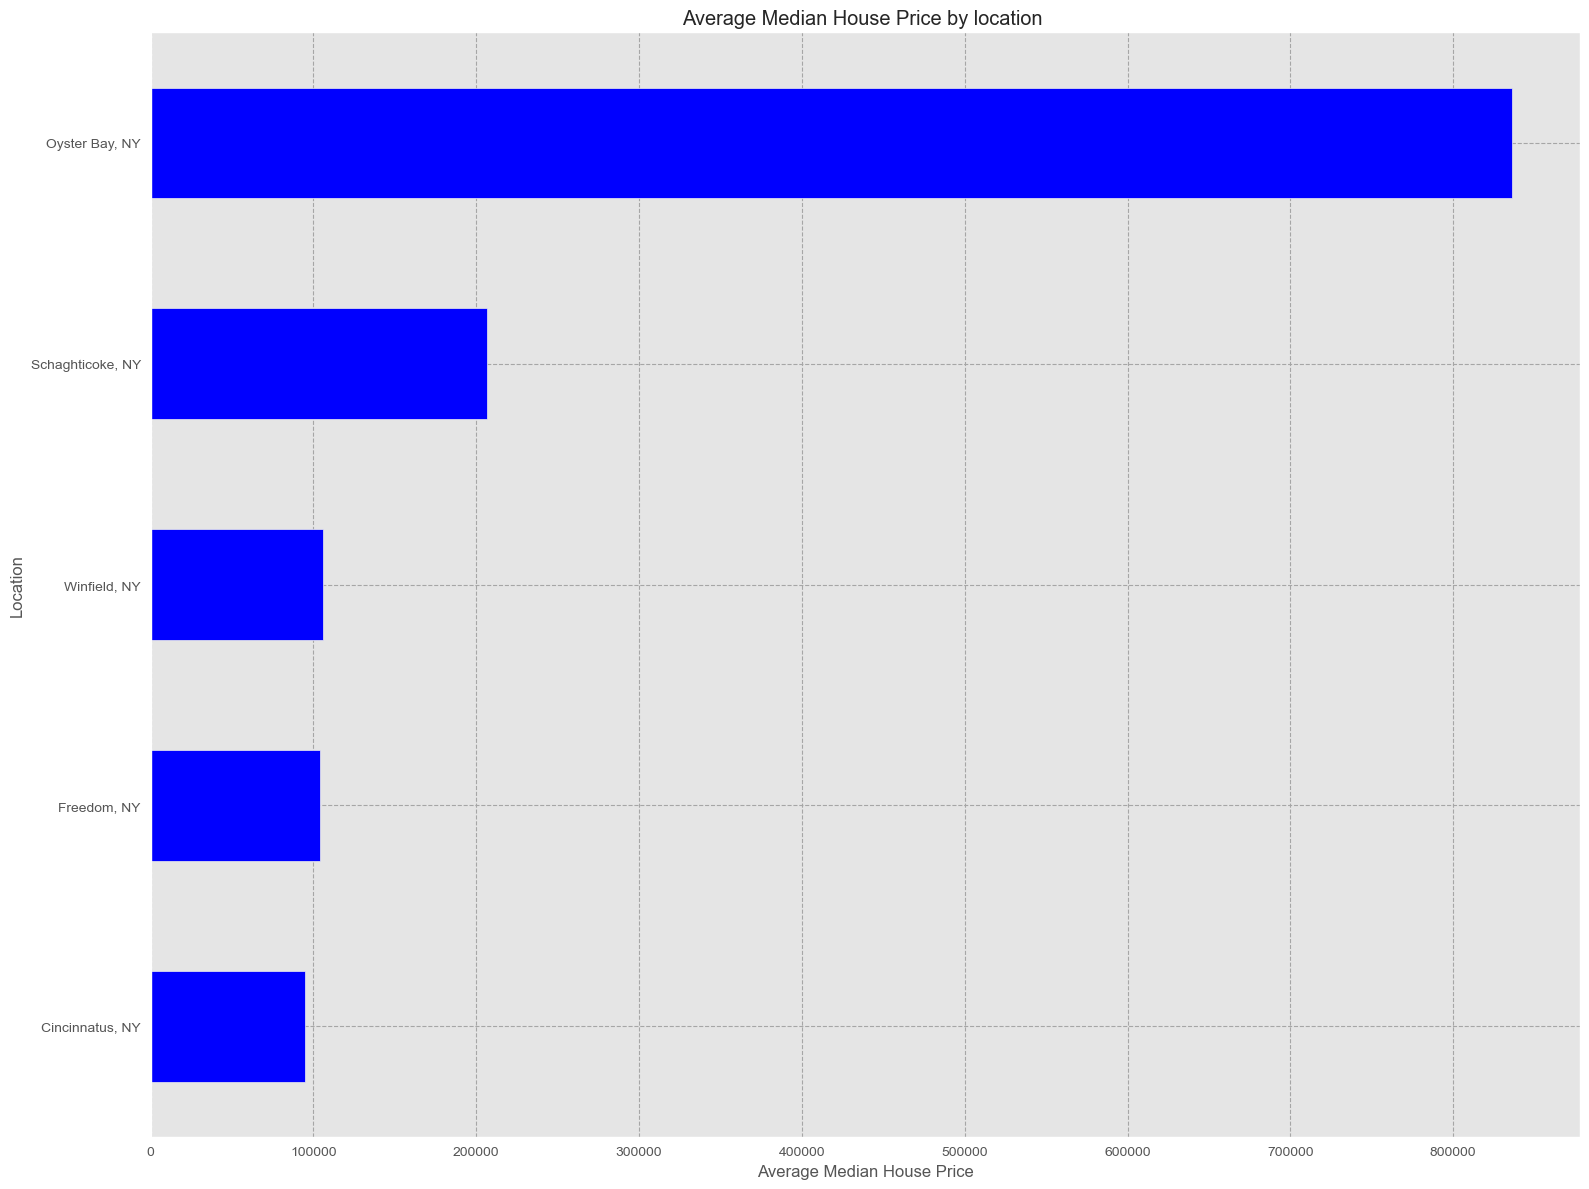

In [ ]:
# Select the top 5 locations
top5_locations = RN_best5['location'].value_counts().nlargest(5).index

# Filter the data for the top 5 locations
filtered_data = RN_best5[RN_best5['location'].isin(top5_locations)]

# Calculate the average median house price for April 2018 for the top 5 locations
locationprice = filtered_data.groupby('location')['2018-04'].mean().sort_values()

# Plotting the average median house price by state for April 2018
plt.figure(figsize=(16, 12))
locationprice.plot(kind='barh', color='blue')
plt.title('Average Median House Price by location ')
plt.xlabel('Average Median House Price')
plt.ylabel('Location')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()


The Average ROI for each location



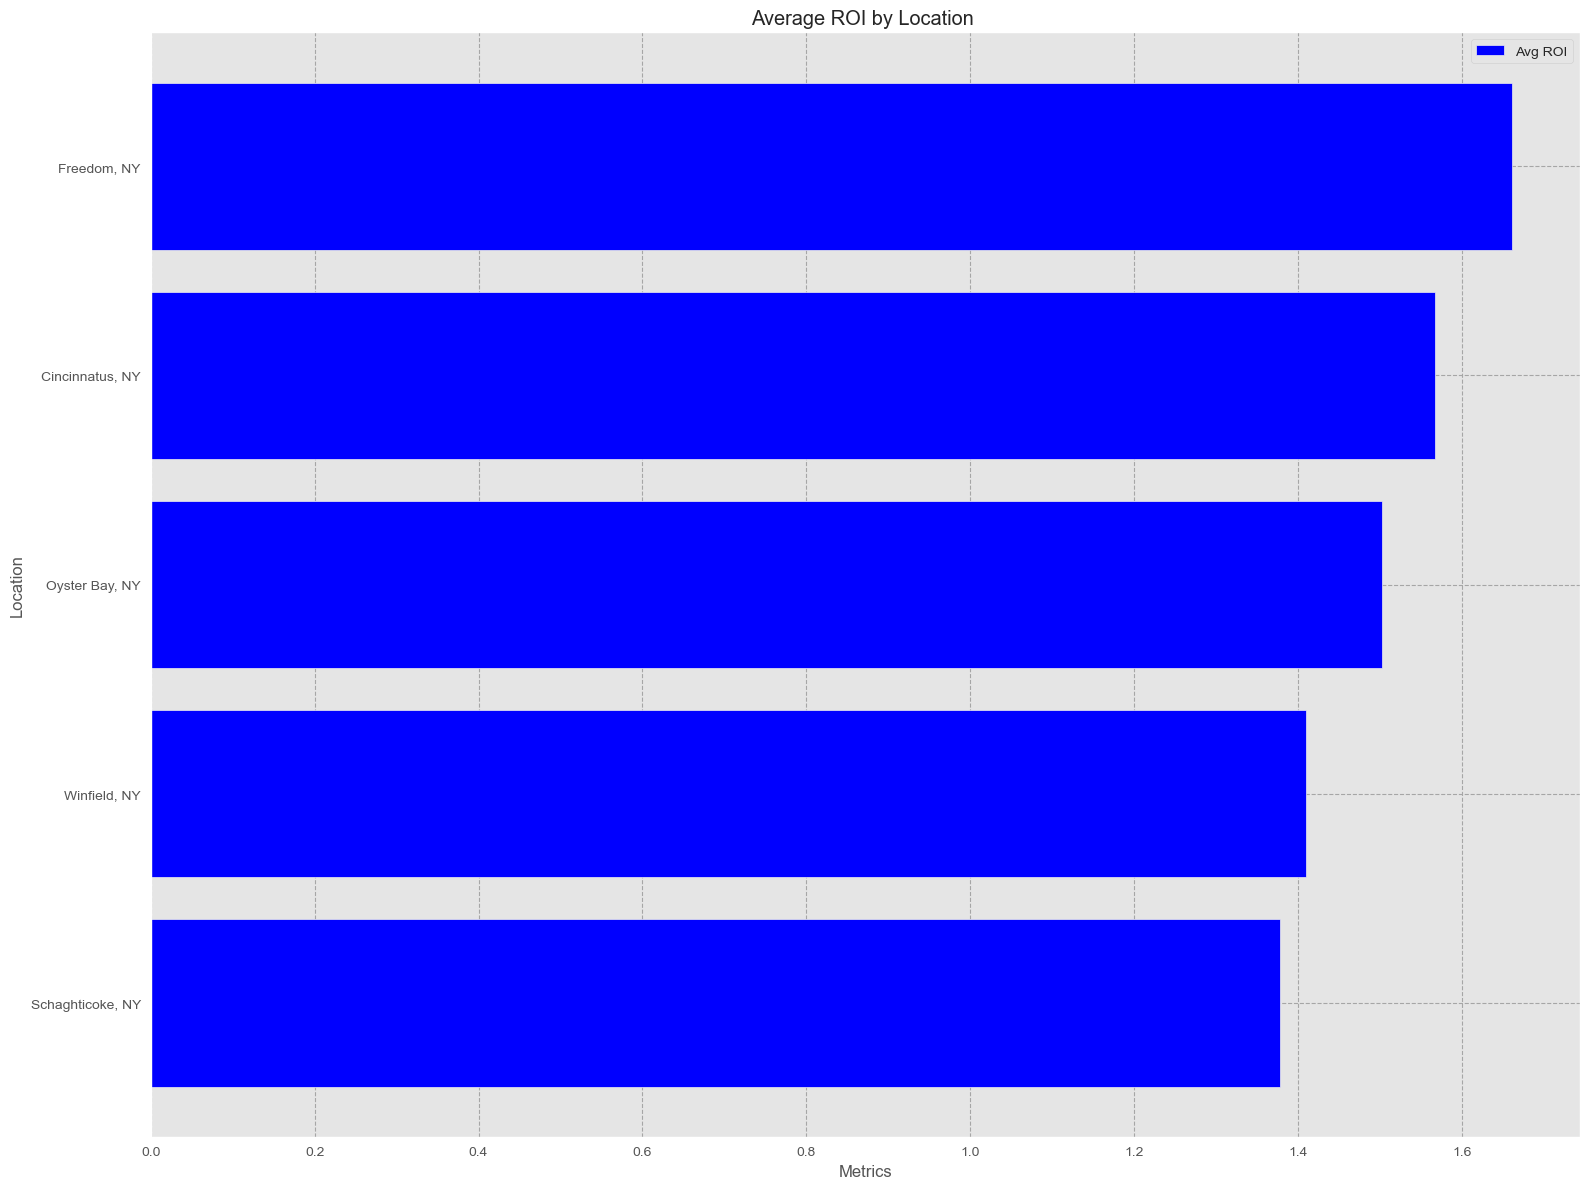

In [ ]:

# Calculate the average ROI for each location
location_roi = RN_best5.groupby('location')['ROI'].mean().sort_values()

# Filter locations based on ROI (for example, select locations with positive ROI)
positive_roi_locations = location_roi[location_roi > 0]

# Plotting the average median house price and ROI by location for April 2018
plt.figure(figsize=(16, 12))
plt.barh(positive_roi_locations.index, location_roi[positive_roi_locations.index], color='blue', label='Avg ROI')
plt.title('Average ROI by Location ')
plt.xlabel('Metrics')
plt.ylabel('Location')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()


### BIVARIATE ANALYSIS

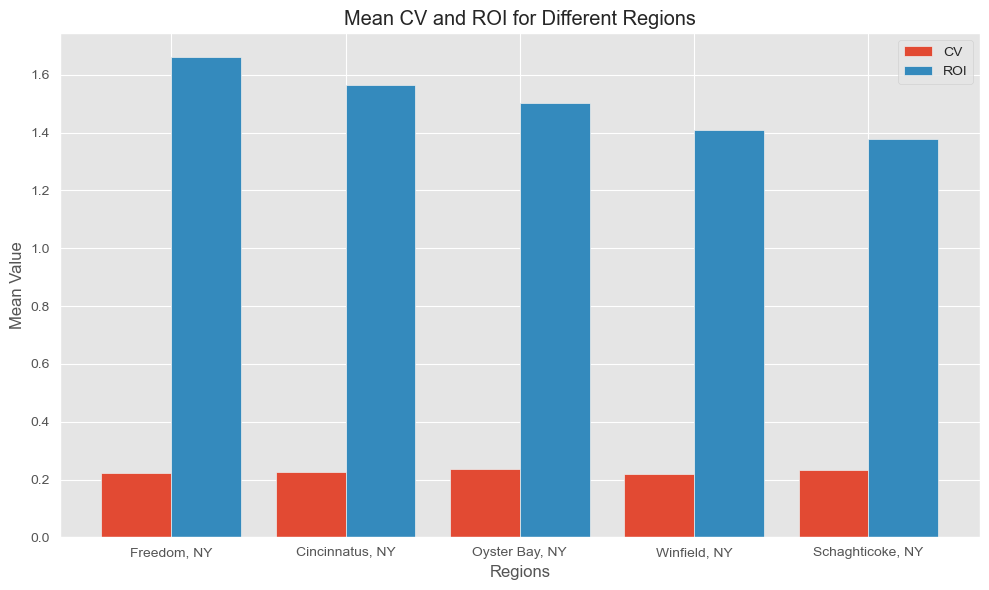

In [ ]:
cv_values = []
roi_values = []

unique_regions = RN_best5['location'].unique()

for region in unique_regions:
    region = RN_best5[RN_best5['location'] == region]
    cv_mean = region['CV'].mean()
    roi_mean = region['ROI'].mean()
    cv_values.append(cv_mean)
    roi_values.append(roi_mean)

# Set up positions for the bars
x = np.arange(len(unique_regions))
width = 0.4

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, cv_values, width, label='CV')
plt.bar(x + width/2, roi_values, width, label='ROI')
plt.xlabel('Regions')
plt.ylabel('Mean Value')
plt.title('Mean CV and ROI for Different Regions')
plt.xticks(x, unique_states)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
RN_best5.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', 'ROI', 'std',
       'mean', 'CV', 'location'],
      dtype='object', length=277)

In [ ]:
import pandas as pd

def get_datetimes(RN_best5):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    return pd.to_datetime(RN_best5.columns.values[7:], format='%Y-%m')

melted_df = pd.melt(RN_best5,
                    id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
                            'SizeRank', 'ROI', 'std', 'mean', 'CV', 'location'],
                    var_name='time')

melted_df['time'] = pd.to_datetime(melted_df['time'], infer_datetime_format=True)

melted_df = melted_df.dropna(subset=['SizeRank'])

melted_df.set_index('time', inplace=True)

melted_df.head(5)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,ROI,std,mean,CV,location,value
time,,,,,,,,,,,,,
1996-04-01,63398,14065,Freedom,NY,Olean,Cattaraugus,14117,1.660714,15833.456790,70804.150943,0.223623,"Freedom, NY",39200.0
1996-04-01,62914,13040,Cincinnatus,NY,Cortland,Cortland,12947,1.566396,15828.431937,69980.000000,0.226185,"Cincinnatus, NY",36900.0
1996-04-01,62245,11771,Oyster Bay,NY,New York,Nassau,8577,1.501795,153623.803098,647299.245283,0.237330,"Oyster Bay, NY",334200.0
1996-04-01,63155,13491,Winfield,NY,Utica,Herkimer,11926,1.410023,16931.938595,77586.792453,0.218232,"Winfield, NY",43900.0
1996-04-01,62431,12154,Schaghticoke,NY,Albany,Rensselaer,12983,1.377880,35243.116639,151281.509434,0.232964,"Schaghticoke, NY",86800.0


In [ ]:
melted_df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'ROI', 'std', 'mean', 'CV', 'location', 'value'],
      dtype='object')

In [ ]:
melted_df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
ROI           0
std           0
mean          0
CV            0
location      0
value         0
dtype: int64

In [ ]:
#Summary of melted data
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1325 entries, 1996-04-01 to 2018-04-01
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1325 non-null   int64  
 1   RegionName  1325 non-null   int64  
 2   City        1325 non-null   object 
 3   State       1325 non-null   object 
 4   Metro       1325 non-null   object 
 5   CountyName  1325 non-null   object 
 6   SizeRank    1325 non-null   int64  
 7   ROI         1325 non-null   float64
 8   std         1325 non-null   float64
 9   mean        1325 non-null   float64
 10  CV          1325 non-null   float64
 11  location    1325 non-null   object 
 12  value       1325 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 144.9+ KB


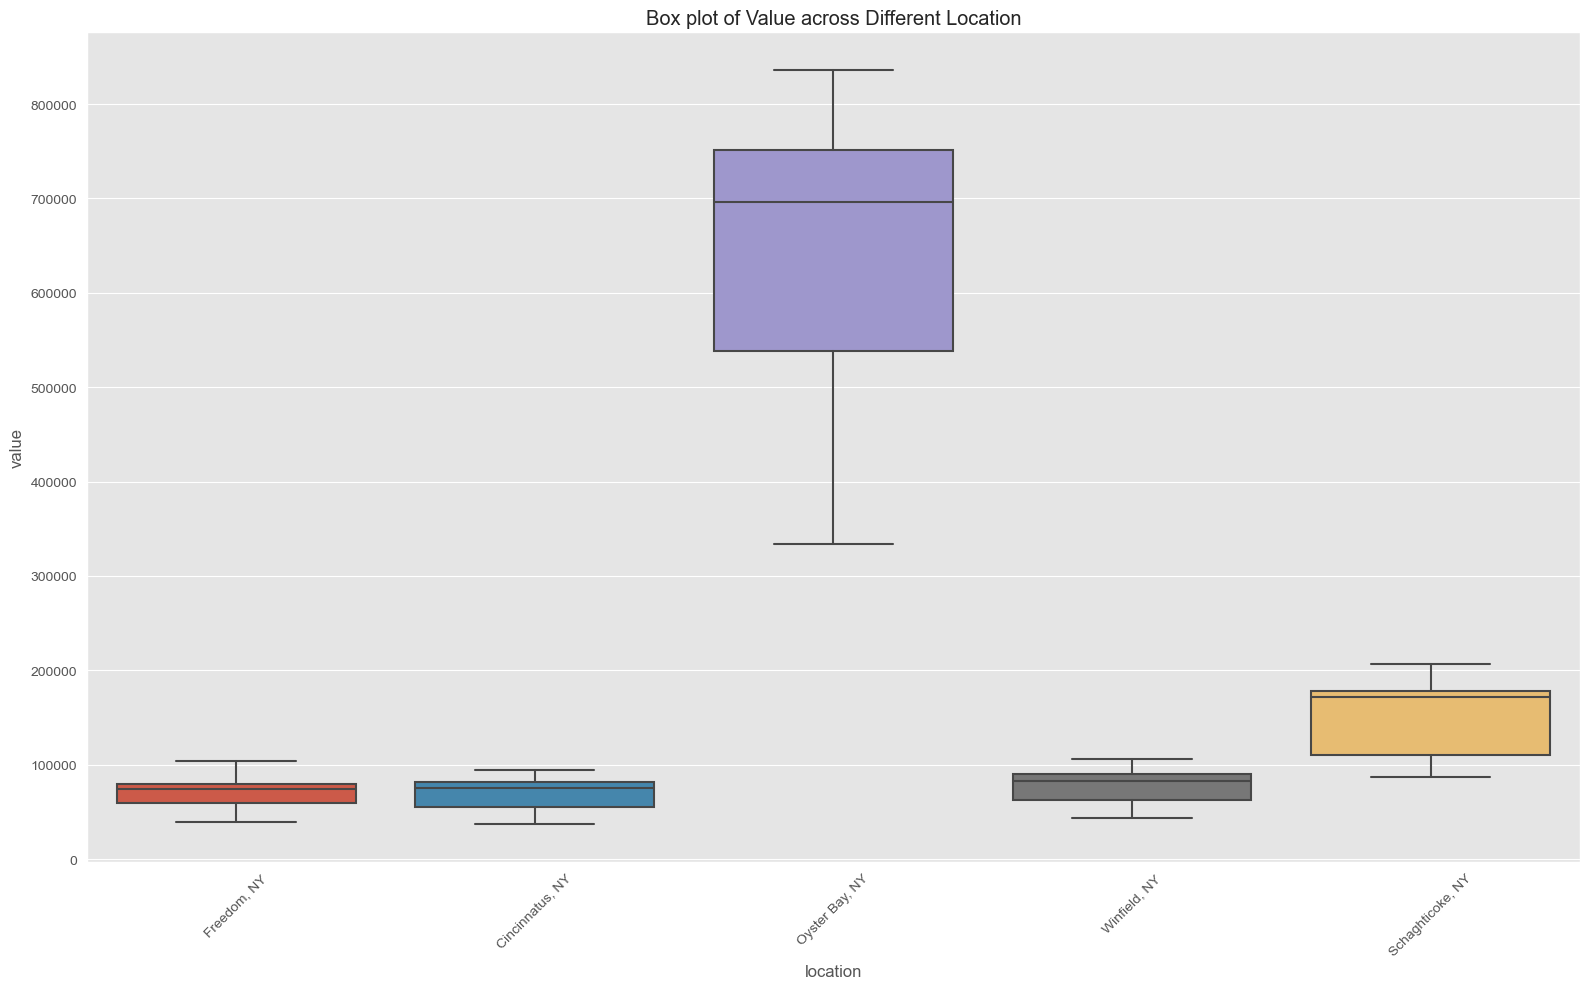

In [ ]:
# Box plots of ROI by location
# Create a box plot for value across different States
plt.figure(figsize=(16, 10))
sns.boxplot(x=melted_df['location'], y=melted_df['value'])
plt.title('Box plot of Value across Different Location')
plt.xlabel('location')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

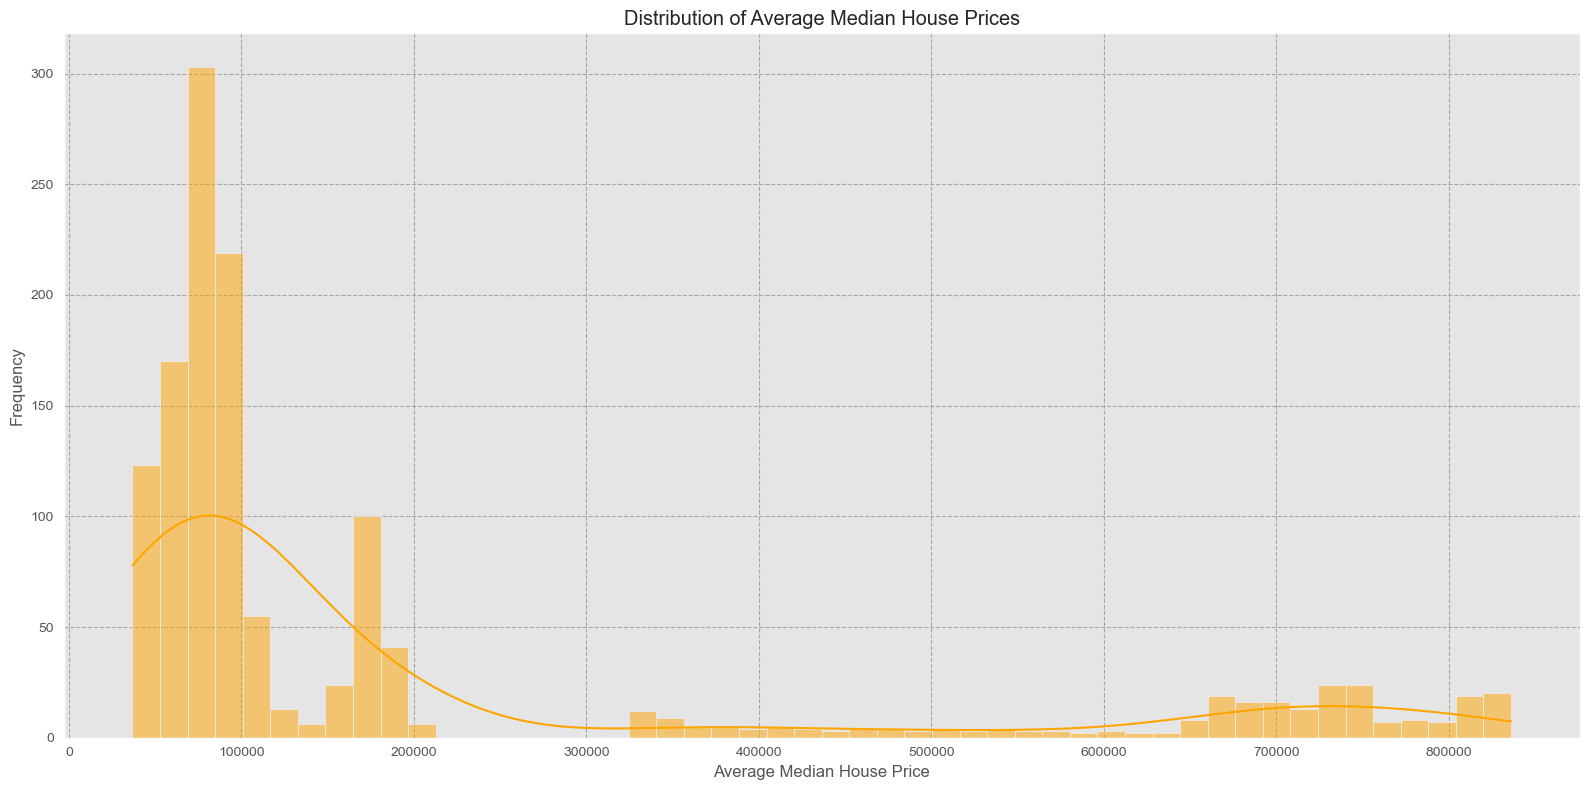

In [ ]:
# Plotting the distribution of median house prices from the sample data
plt.figure(figsize=(16, 8))
sns.histplot(melted_df['value'], bins=50, kde=True, color='orange')
plt.title('Distribution of Average Median House Prices')
plt.xlabel('Average Median House Price')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

#### Time series Modelling

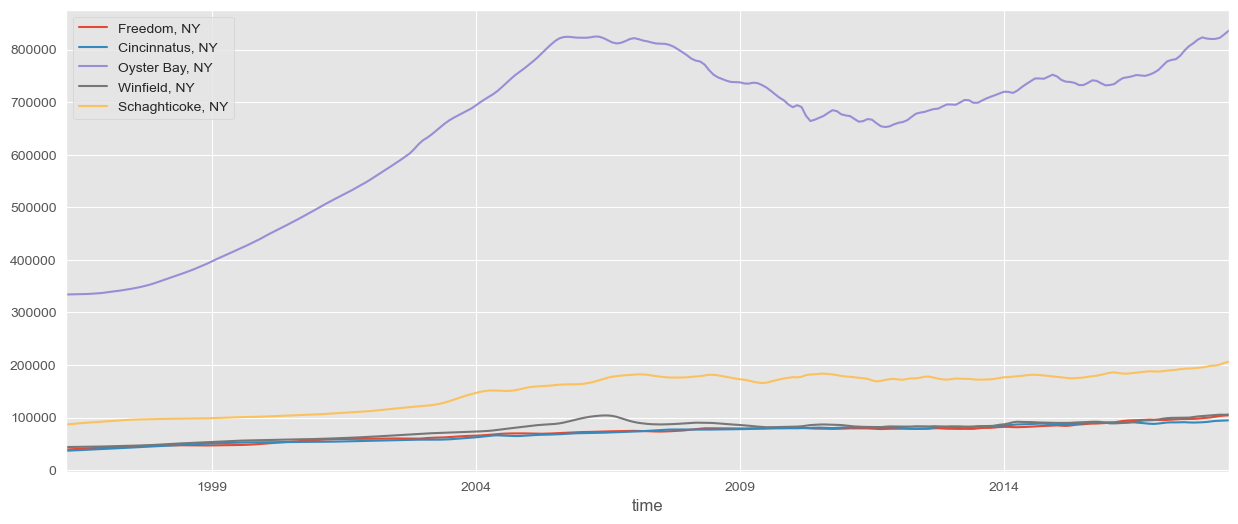

In [ ]:
 # Get unique locations from the 'location' column
locations = melted_df['location'].unique()

# Loop through the unique locations and plot the 'value' column for each location
for location in locations:
    subset = melted_df[melted_df['location'] == location]
    subset['value'].plot(label=location, figsize=(15, 6))

plt.legend()
plt.show()

In [ ]:
print("Unique RegionNames:", unique_RegionName)

Unique RegionNames: [14065 13040 11771 13491 12154]


In [ ]:
import numpy as np
# Unique RegionNames from melted_df
unique_RegionNames = melted_df['location'].unique()
# Add a new 'ret' column to df_melted to store monthly returns
melted_df['mr'] = np.nan
# Calculate monthly returns for each unique zip code
for RegionName in unique_RegionNames:
    subset = melted_df[melted_df['location'] == RegionName].copy()
    for i in range(len(subset) - 1):
        subset['mr'].iloc[i + 1] = (subset['value'].iloc[i + 1] / subset['value'].iloc[i]) - 1
    melted_df.loc[melted_df['location'] == RegionName, 'mr'] = subset['mr']

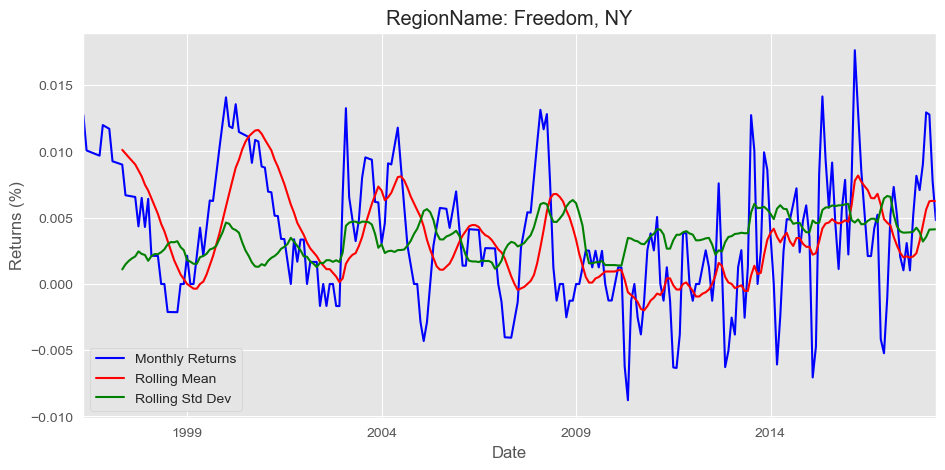

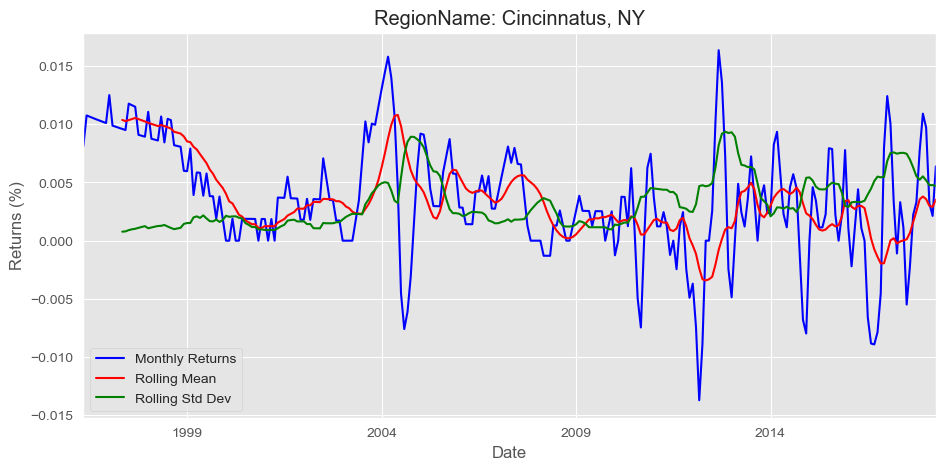

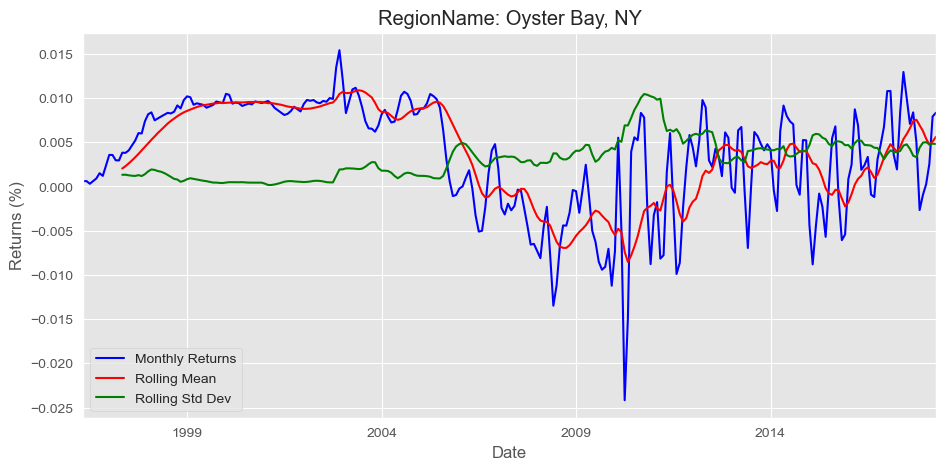

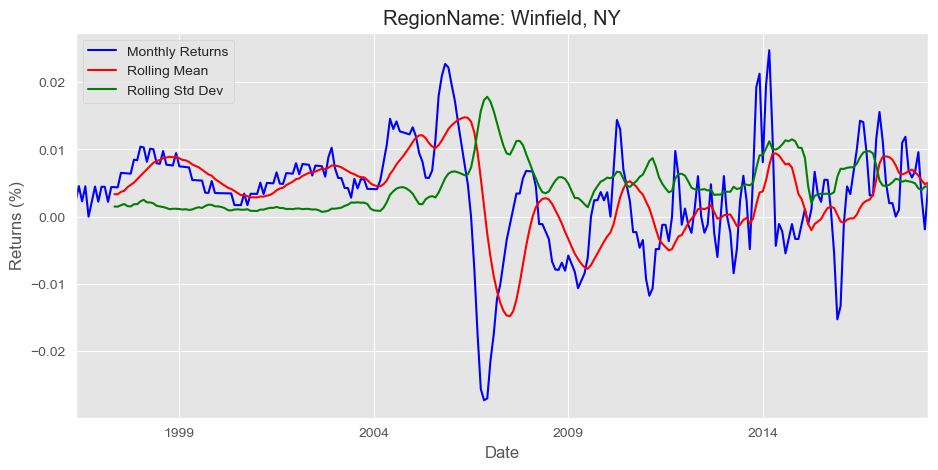

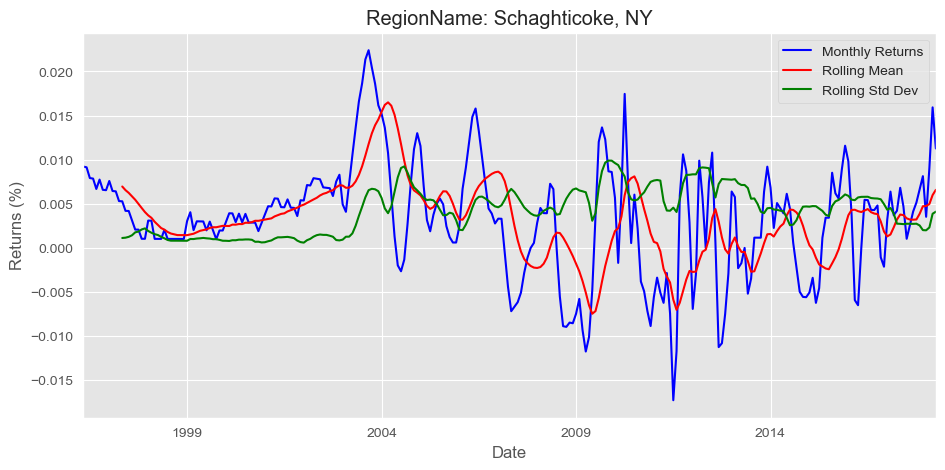

In [ ]:
# Plotting the monthly returns along with rolling mean and std for each unique zip code
for RegionName in unique_RegionNames:
    subset = melted_df[melted_df['location'] == RegionName]

    # Calculate rolling mean and rolling standard deviation
    rolling_mean = subset['mr'].rolling(window=12).mean()
    rolling_std = subset['mr'].rolling(window=12).std()

    plt.figure(figsize=(11,5))
    subset['ret'].plot(color='b', label='Monthly Returns')
    rolling_mean.plot(color='red', label='Rolling Mean')
    rolling_std.plot(color='green', label='Rolling Std Dev')

    plt.title(f'RegionName: {RegionName}')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend(loc='best')
    plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Extracting unique RegionNames
unique_RegionNames = melted_df['RegionName'].unique()

# Set a minimum threshold for the number of data points required for the test
min_data_points = 20  # Adjust this threshold as needed

# Loop through each unique RegionName and perform Dickey-Fuller test on their 'ret' values
for RegionName in unique_RegionNames:
    subset = melted_df[melted_df['RegionName'] == RegionName]

    # Check if the subset has enough data points for the test
    if len(subset['mr'].dropna()) >= min_data_points:
        print(f"Results of Dickey-Fuller Test for RegionName: {RegionName}\n")
        dftest = adfuller(subset['mr'].dropna())

        # Extract and display test results in a user-friendly manner
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput[f'Critical Value ({key})'] = value
        print(dfoutput)
        print('-' * 50)
    else:
        print(f"RegionName: {RegionName} does not have enough data points for the test.\n")


Results of Dickey-Fuller Test for RegionName: 14065

Test Statistic                  -3.773559
p-value                          0.003190
#Lags Used                       8.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64
--------------------------------------------------
Results of Dickey-Fuller Test for RegionName: 13040

Test Statistic                -5.657947e+00
p-value                        9.524893e-07
#Lags Used                     2.000000e+00
Number of Observations Used    2.600000e+02
Critical Value (1%)           -3.455754e+00
Critical Value (5%)           -2.872721e+00
Critical Value (10%)          -2.572728e+00
dtype: float64
--------------------------------------------------
Results of Dickey-Fuller Test for RegionName: 11771

Test Statistic                  -1.385816
p-value                          0.589057
#Lags Used             

In [ ]:
melted_df['mr'].dropna()

time
1996-06-01    0.010076
1996-06-01    0.010753
1996-06-01    0.000598
1996-06-01    0.004545
1996-06-01    0.009132
                ...   
2018-04-01    0.004817
2018-04-01    0.006376
2018-04-01    0.008321
2018-04-01    0.004748
2018-04-01    0.011269
Name: mr, Length: 1315, dtype: float64

In [ ]:
# Check for missing values in the 'ret' column
missing_values = melted_df['mr'].isnull().sum()

# Print the number of missing values
print(f"Number of missing values in 'mr' column: {missing_values}")

# Drop rows with missing values in the 'ret' column
melted_df.dropna(subset=['ret'], inplace=True)
print(f"Number of missing values in 'mr' column: {missing_values}")

Number of missing values in 'mr' column: 5
Number of missing values in 'mr' column: 5


In [ ]:
melted_df['mr'].isnull().sum()

5

In [ ]:
melted_df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
ROI           0
std           0
mean          0
CV            0
location      0
value         0
ret           0
mr            5
dtype: int64

In [ ]:
mean_mr = melted_df['mr'].mean()
melted_df['mr'].fillna(mean_mr, inplace=True)

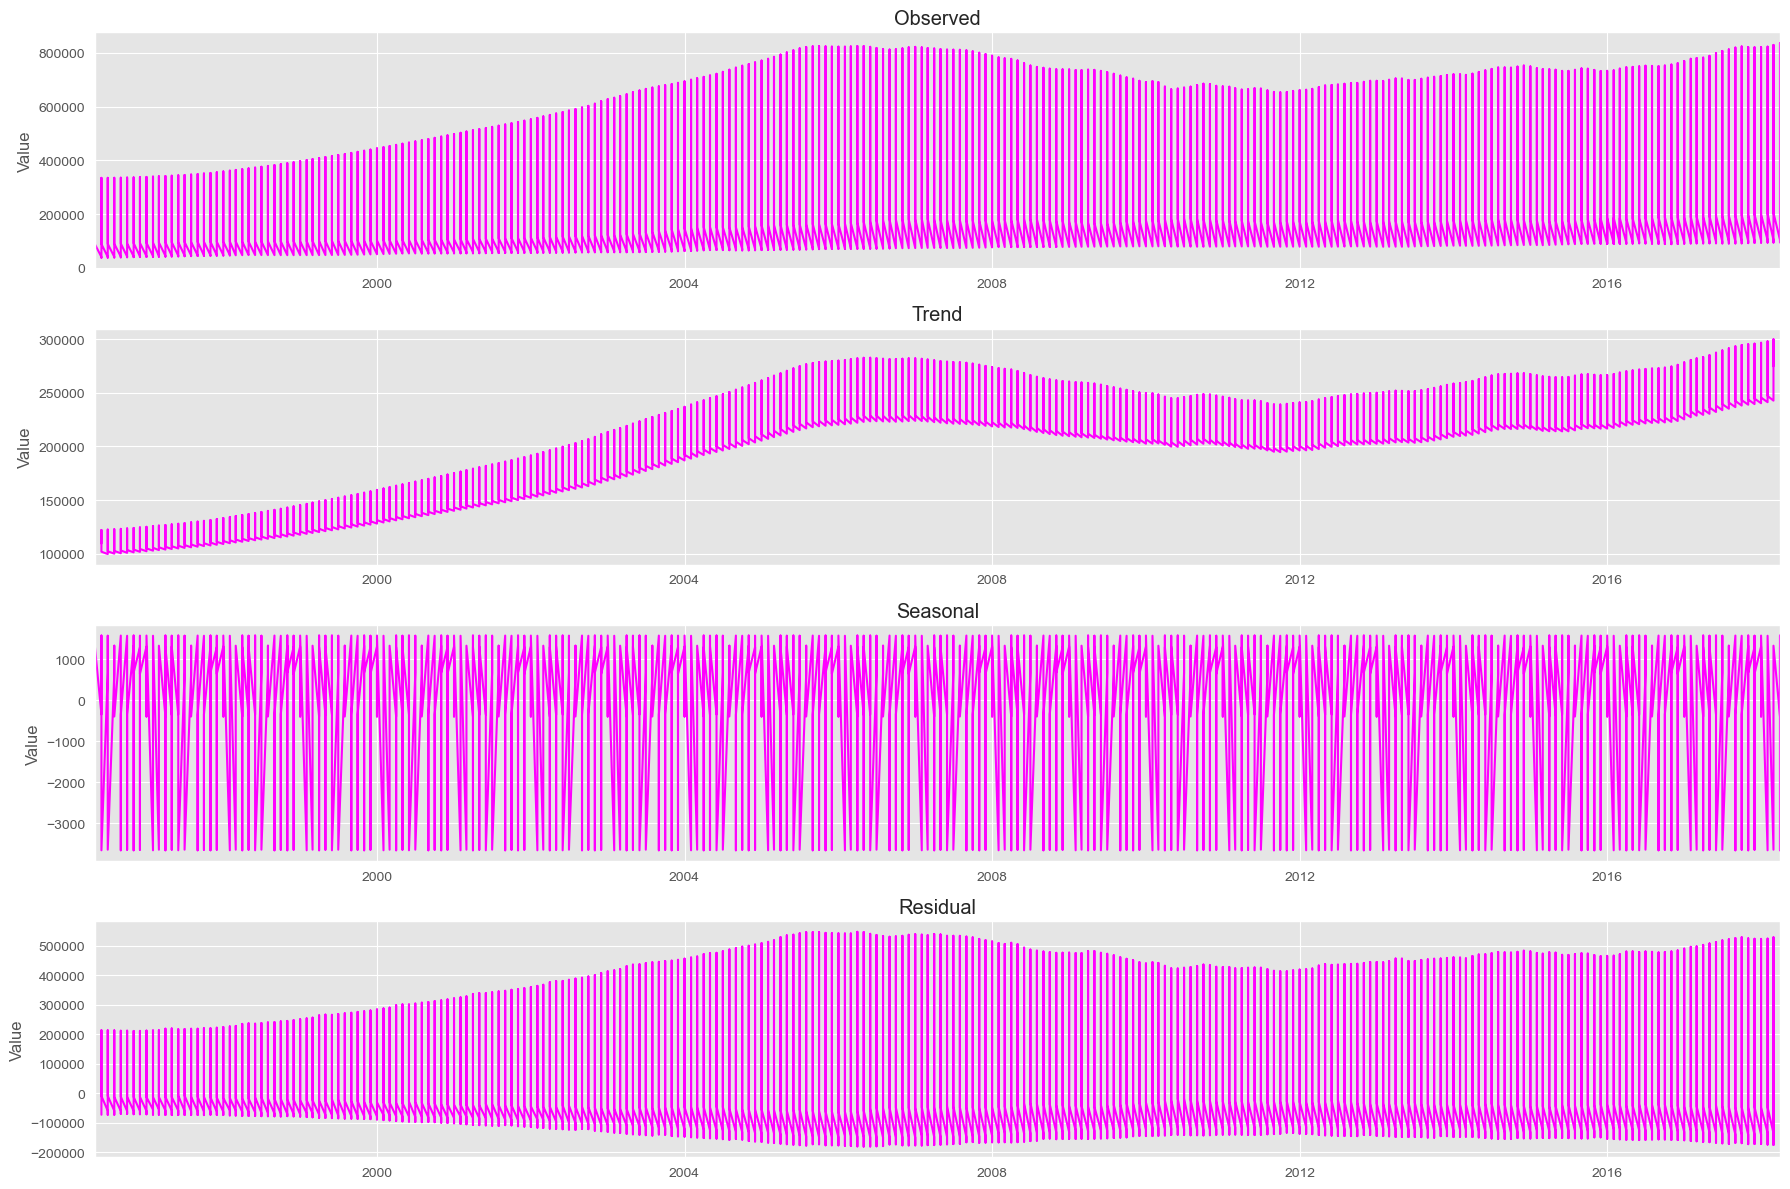

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition
decomposition = seasonal_decompose(melted_df['value'], model='additive', period=12)

# Plot the decomposed time series components
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(18, 12))

# Original Time Series
axes[0].plot(decomposition.observed, color='magenta')
axes[0].set_title('Observed')
axes[0].set_ylabel('Value')
axes[0].set_xlim([decomposition.observed.index.min(), decomposition.observed.index.max()])

# Trend component
axes[1].plot(decomposition.trend, color='magenta')
axes[1].set_title('Trend')
axes[1].set_ylabel('Value')
axes[1].set_xlim([decomposition.trend.index.min(), decomposition.trend.index.max()])

# Seasonal component
axes[2].plot(decomposition.seasonal, color='magenta')
axes[2].set_title('Seasonal')
axes[2].set_ylabel('Value')
axes[2].set_xlim([decomposition.seasonal.index.min(), decomposition.seasonal.index.max()])

# Residual component
axes[3].plot(decomposition.resid, color='magenta')
axes[3].set_title('Residual')
axes[3].set_ylabel('Value')
axes[3].set_xlim([decomposition.resid.index.min(), decomposition.resid.index.max()])

plt.tight_layout()
plt.show()


In [ ]:
time_intervals = df.index.to_series().diff().dropna()
consistent_intervals = time_intervals.unique().shape[0] == 1
if consistent_intervals:
    print("Time intervals are consistent.")
else:
    print("Time intervals are not consistent.")


Time intervals are consistent.


In [ ]:
import numpy as np
import pandas as pd
def difference_series(series_i, lag=1):
    '''Takes in a series and returns the differenced version of that series'''
    diff_series = series_i.diff(periods=lag)
    dropped_nans = diff_series.dropna()
    return dropped_nans
# Load your data into the 'melted_df' DataFrame
# (Assuming melted_df contains your data)
# Specify the unique RegionName you want to analyze (11771 in this case)
target_region = 11771
# Specify the column name you want to analyze (e.g., 'ret')
target_column = 'mr'
# Filter the melted DataFrame for the specific RegionName
region_subset = melted_df[melted_df['RegionName'] == target_region]
# Apply differencing using the provided function
lag = 1  # Adjust this as needed
differenced_column = difference_series(region_subset[target_column], lag=lag)
# Calculate rolling mean of the differenced column
rolling_mean = differenced_column.rolling(window=12).mean()
# Detrend the differenced column by subtracting the rolling mean
detrended_series = differenced_column - rolling_mean
# Add the detrended series back to the main DataFrame
region_subset['detrended'] = detrended_series
# ... rest of the code for plotting ...

In [ ]:
import numpy as np
import pandas as pd

def log_transform(series_i):
    '''Takes in a series and returns the log transformed version of that series'''
    log_transformed = np.log(series_i)
    dropped_nans = log_transformed.dropna()
    return dropped_nans

def difference_series(series_i, lag=1):
    '''Takes in a series and returns the differenced version of that series'''
    diff_series = series_i.diff(periods=lag)
    dropped_nans = diff_series.dropna()
    return dropped_nans

# Load your data into the 'melted_df' DataFrame
# (Assuming melted_df contains your data)

# Specify the unique RegionName you want to analyze (11771 in this case)
target_region = 11771

# Specify the column name you want to analyze (e.g., 'ret')
target_column = 'mr'

# Filter the melted DataFrame for the specific RegionName
region_subset = melted_df[melted_df['RegionName'] == target_region]

# Apply differencing using the provided function
lag = 1  # Adjust this as needed
differenced_column = difference_series(region_subset[target_column], lag=lag)

# Calculate rolling mean of the differenced column
rolling_mean = differenced_column.rolling(window=12).mean()

# Detrend the differenced column by subtracting the rolling mean
detrended_series = differenced_column - rolling_mean

# Add the detrended series back to the main DataFrame
region_subset['detrended'] = detrended_series

# ... rest of the code for plotting ...


In [ ]:
# Assuming you have a DataFrame called 'melted_df'
nan_count = region_subset.isna().sum()

# If you want to count NaN values in a specific column (e.g., 'ret')
ret_nan_count = region_subset['mr'].isna().sum()

# To count NaN values in the entire DataFrame
total_nan_count = region_subset.isna().sum().sum()

print("NaN count per column:")
print(nan_count)

print("NaN count in 'ret' column:")
print(ret_nan_count)

print("Total NaN count in the DataFrame:")
print(total_nan_count)


NaN count per column:
RegionID       0
RegionName     0
City           0
State          0
Metro          0
CountyName     0
SizeRank       0
ROI            0
std            0
mean           0
CV             0
location       0
value          0
ret            0
mr             0
detrended     12
dtype: int64
NaN count in 'ret' column:
0
Total NaN count in the DataFrame:
12


In [ ]:
# Drop rows with NaN values in the 'mr' column
region_subset = region_subset.dropna(subset=['detrended'])

# Print the updated DataFrame
print(region_subset)


            RegionID  RegionName        City State     Metro CountyName  \
time                                                                      
1997-05-01     62245       11771  Oyster Bay    NY  New York     Nassau   
1997-06-01     62245       11771  Oyster Bay    NY  New York     Nassau   
1997-07-01     62245       11771  Oyster Bay    NY  New York     Nassau   
1997-08-01     62245       11771  Oyster Bay    NY  New York     Nassau   
1997-09-01     62245       11771  Oyster Bay    NY  New York     Nassau   
...              ...         ...         ...   ...       ...        ...   
2017-12-01     62245       11771  Oyster Bay    NY  New York     Nassau   
2018-01-01     62245       11771  Oyster Bay    NY  New York     Nassau   
2018-02-01     62245       11771  Oyster Bay    NY  New York     Nassau   
2018-03-01     62245       11771  Oyster Bay    NY  New York     Nassau   
2018-04-01     62245       11771  Oyster Bay    NY  New York     Nassau   

            SizeRank    

In [ ]:
region_subset.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,ROI,std,mean,CV,location,value,ret,mr,detrended
time,,,,,,,,,,,,,,,,
1997-05-01,62245,11771,Oyster Bay,NY,New York,Nassau,8577,1.501795,153623.803098,647299.245283,0.23733,"Oyster Bay, NY",342600.0,0.003809,0.003809,0.000843
1997-06-01,62245,11771,Oyster Bay,NY,New York,Nassau,8577,1.501795,153623.803098,647299.245283,0.23733,"Oyster Bay, NY",343900.0,0.003795,0.003795,-0.000281
1997-07-01,62245,11771,Oyster Bay,NY,New York,Nassau,8577,1.501795,153623.803098,647299.245283,0.23733,"Oyster Bay, NY",345300.0,0.004071,0.004071,-0.000038
1997-08-01,62245,11771,Oyster Bay,NY,New York,Nassau,8577,1.501795,153623.803098,647299.245283,0.23733,"Oyster Bay, NY",346900.0,0.004634,0.004634,0.000226
1997-09-01,62245,11771,Oyster Bay,NY,New York,Nassau,8577,1.501795,153623.803098,647299.245283,0.23733,"Oyster Bay, NY",348700.0,0.005189,0.005189,0.000197


In [ ]:
import numpy as np
import pandas as pd
def difference_series(series_i, lag=1):
    '''Takes in a series and returns the differenced version of that series'''
    diff_series = series_i.diff(periods=lag)
    dropped_nans = diff_series.dropna()
    return dropped_nans
# Load your data into the 'melted_df' DataFrame
# (Assuming melted_df contains your data)
# Specify the unique RegionName you want to analyze (11771 in this case)
target_region = 11771
# Specify the column name you want to analyze (e.g., 'ret')
target_column = 'mr'
# Filter the melted DataFrame for the specific RegionName
region_subset = melted_df[melted_df['RegionName'] == target_region]
# Apply differencing using the provided function
lag = 1  # Adjust this as needed
differenced_column = difference_series(region_subset[target_column], lag=lag)
# Calculate rolling mean of the differenced column
rolling_mean = differenced_column.rolling(window=12).mean()
# Detrend the differenced column by subtracting the rolling mean
detrended_series = differenced_column - rolling_mean
# Add the detrended series back to the main DataFrame
region_subset['detrended'] = detrended_series
# ... rest of the code for plotting ...

In [ ]:
nan_count = region_subset.isna().sum()
nan_count

RegionID       0
RegionName     0
City           0
State          0
Metro          0
CountyName     0
SizeRank       0
ROI            0
std            0
mean           0
CV             0
location       0
value          0
ret            0
mr             0
detrended     12
dtype: int64

In [ ]:
#was checking for stationarity for the new dataset
from statsmodels.tsa.stattools import adfuller

# Extracting unique RegionNames
unique_RegionNames = region_subset['RegionName'].unique()

# Set a minimum threshold for the number of data points required for the test
min_data_points = 20  # Adjust this threshold as needed

# Loop through each unique RegionName and perform Dickey-Fuller test on their 'detrended' values
for RegionName in unique_RegionNames:
    subset = region_subset[region_subset['RegionName'] == RegionName]

    # Check if the subset has enough data points for the test
    if len(subset['detrended'].dropna()) >= min_data_points:
        print(f"Results of Dickey-Fuller Test for RegionName: {RegionName}\n")
        dftest = adfuller(subset['detrended'].dropna())

        # Extract and display test results in a user-friendly manner
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput[f'Critical Value ({key})'] = value
        print(dfoutput)
        print('-' * 50)
    else:
        print(f"RegionName: {RegionName} does not have enough data points for the test.\n")


Results of Dickey-Fuller Test for RegionName: 11771

Test Statistic                -7.754257e+00
p-value                        9.833255e-12
#Lags Used                     1.500000e+01
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64
--------------------------------------------------


In [ ]:
#Create a new DataFrame with just the index and the 'Detrended_Target' column
selected_columns = ['detrended']
selected_data = region_subset[selected_columns]

# Now selected_data contains the 'Detrended_Target' column along with the time index
selected_data.head(5)

,detrended
time,
1996-05-01,NaN
1996-06-01,NaN
1996-07-01,NaN
1996-08-01,NaN
1996-09-01,NaN


In [ ]:
selected_data = selected_data.dropna(subset=['detrended'])
selected_data

,detrended
time,
1997-05-01,0.000843
1997-06-01,-0.000281
1997-07-01,-0.000038
1997-08-01,0.000226
1997-09-01,0.000197
...,...
2017-12-01,0.002341
2018-01-01,0.002095
2018-02-01,0.003001


In [ ]:
# Printing out the lengths of our unsplit time series
#Spliting the data into train and test
print(f'Whole series lengths: {len(region_subset)} \n')
selected_data.index = pd.to_datetime(region_subset.index)

# Manually dividing the data into train and test sets
train = selected_data[:'2013-04']
test = selected_data['2013-05':]

# Printing the lengths of our new train and test sets
print(f'Train set lengths: {len(train)}')
print(f'Test set lengths: {len(test)} \n')

# Checking that the proportions are how we want them
print(f'Train proportion = {round(len(train) / len(selected_data),1)}')
print(f'Test proportion = {round(len(test) / len(selected_data),1)} \n')

# Checking the length in years of our train and test sets
print(f'Train set length in years: {round(len(train) / 12, 2)}')
print(f'Test set length in years: {round(len(test) / 12, 2)}')

Whole series lengths: 252 

Train set lengths: 192
Test set lengths: 60 

Train proportion = 0.8
Test proportion = 0.2 

Train set length in years: 16.0
Test set length in years: 5.0


## MODELLING

### BASELINE MODEL ARIMA MODEL

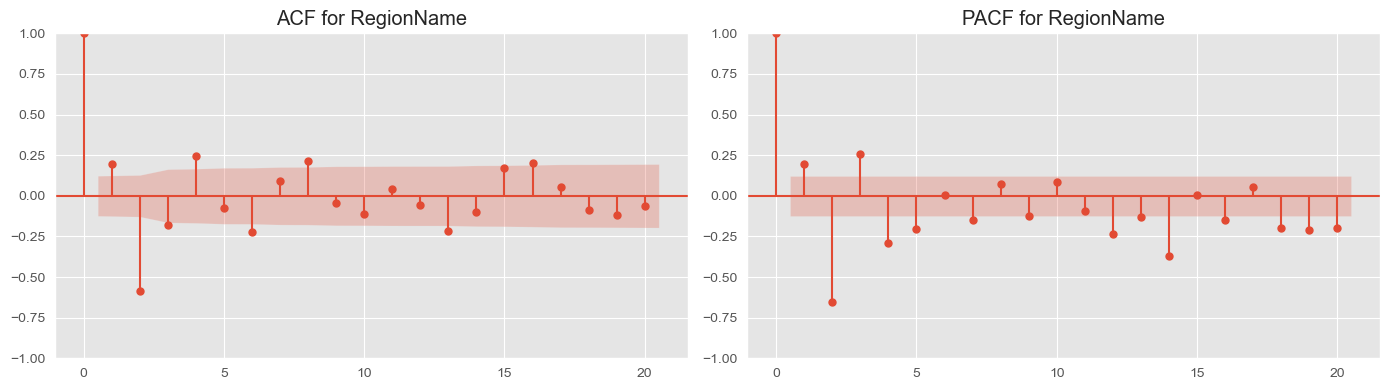

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
label = 'RegionName'
data = selected_data['detrended']  # Replace with your detrended target data
max_lags_acf = min(20, len(data)-1)  # Adjust lags for ACF based on data length
max_lags_pacf = min(max_lags_acf, len(data)//2 - 1)  # Adjust lags for PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Plot ACF
plot_acf(data, ax=ax[0], lags=max_lags_acf)
ax[0].set_title(f'ACF for {label}')
# Plot PACF
if max_lags_pacf > 0:  # Ensure we have at least one lag for PACF
    plot_pacf(data, ax=ax[1], lags=max_lags_pacf)
    ax[1].set_title(f'PACF for {label}')
else:
    ax[1].set_title(f'PACF for {label} (Not enough data for PACF)')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
order = (2, 1, 2)  # Replace p, d, and q with appropriate values
model = ARIMA(train, order=order)
fitted_model = model.fit()

# Get the summary of the model
model_summary = fitted_model.summary()

# Print the model summary
print(model_summary)


                               SARIMAX Results                                
Dep. Variable:              detrended   No. Observations:                  192
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 886.573
Date:                Tue, 29 Aug 2023   AIC                          -1763.145
Time:                        21:54:15   BIC                          -1746.884
Sample:                    05-01-1997   HQIC                         -1756.559
                         - 04-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0088      0.050      0.176      0.861      -0.090       0.107
ar.L2         -0.6445      0.036    -17.684      0.000      -0.716      -0.573
ma.L1         -0.0428      0.065     -0.660      0.5

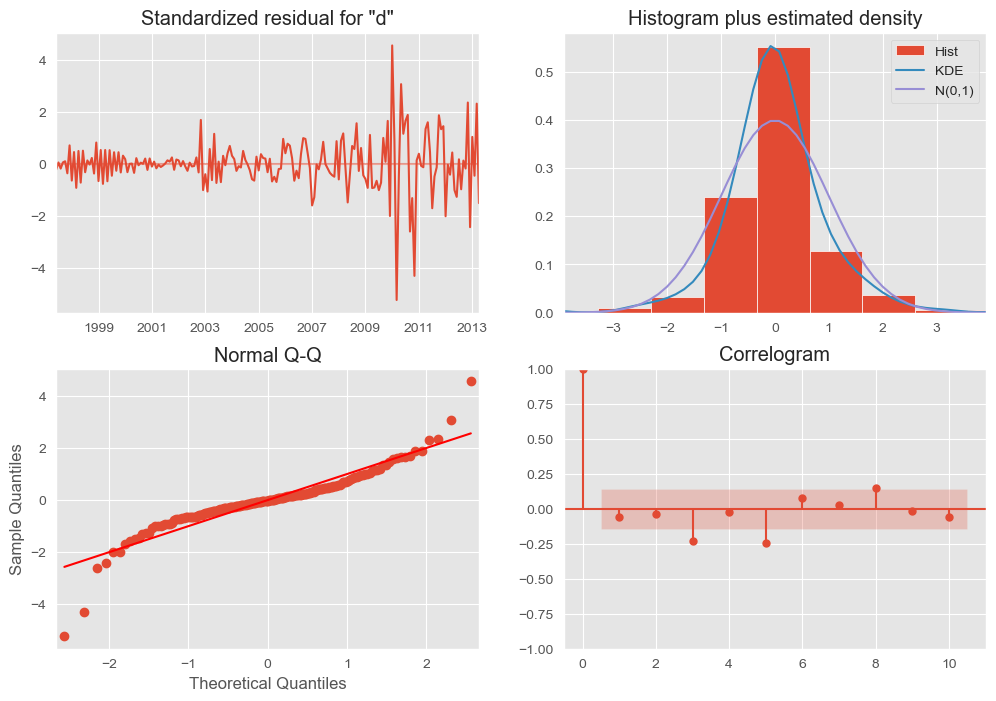

In [ ]:
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()

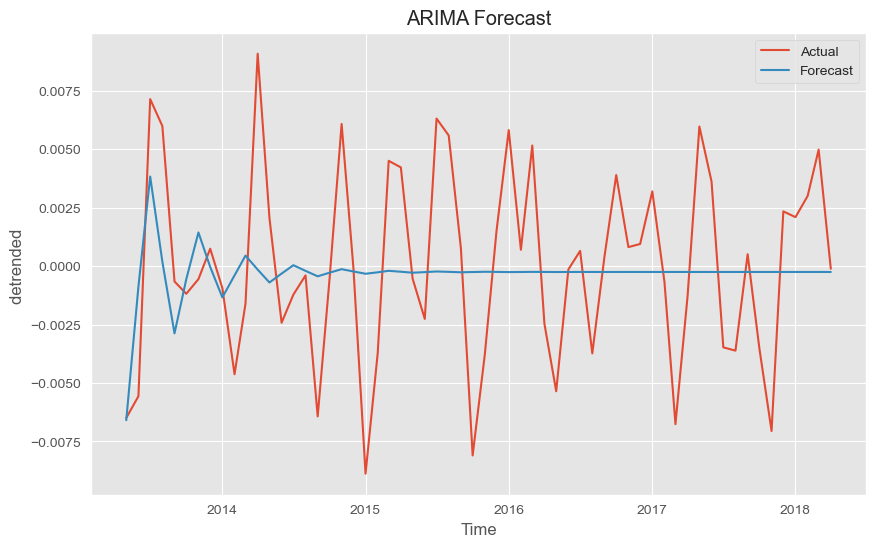

Mean Squared Error: 1.5478748245919397e-05


In [ ]:
# Forecast future values
forecast_steps = len(test)
forecast = fitted_model.forecast(steps=forecast_steps)
# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('detrended ')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
# Calculate and print the model's performance metrics (optional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

In [ ]:
#tuning the baselline to improve performance


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

# Fit an automatic ARIMA model
stepwise_model = auto_arima(train, seasonal=False, trace=True)

# Summary of the best model
print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1805.397, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1653.325, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1658.444, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1735.493, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1814.415, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1725.532, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1770.229, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1814.520, Time=1.37 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1794.305, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-1791.931, Time=0.38 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1809.427, Time=0.37 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-1830.314, Time=0.23 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-1828.573, Time=0.27 sec
 ARIMA(5,0,1)(0,0,0)[0]  

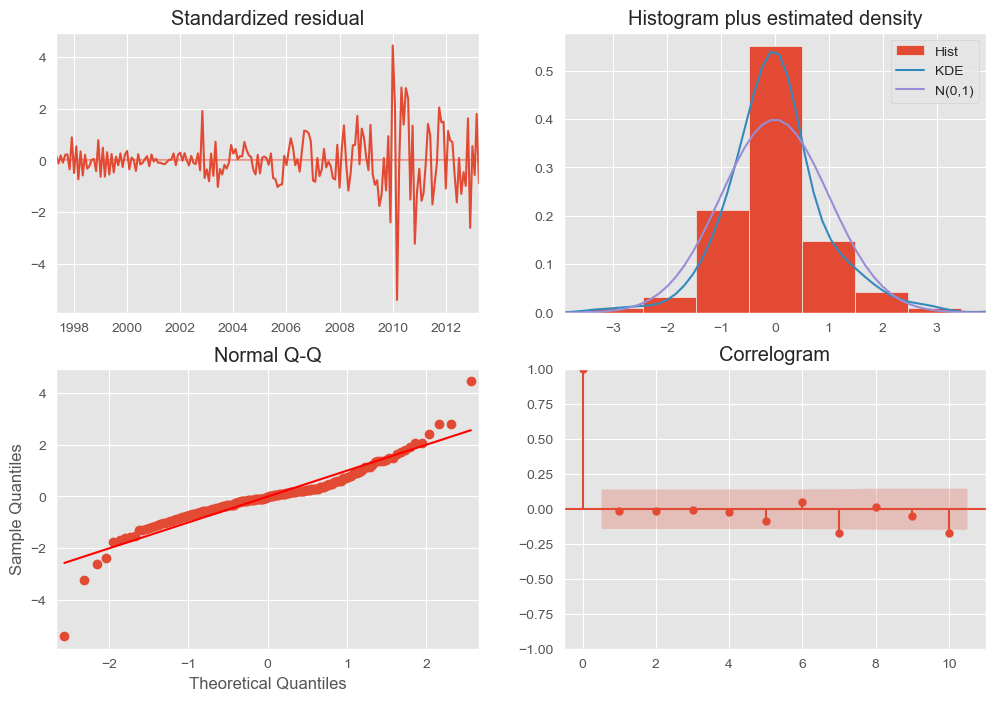

In [ ]:
stepwise_model.plot_diagnostics(figsize=(12, 8))
plt.show()

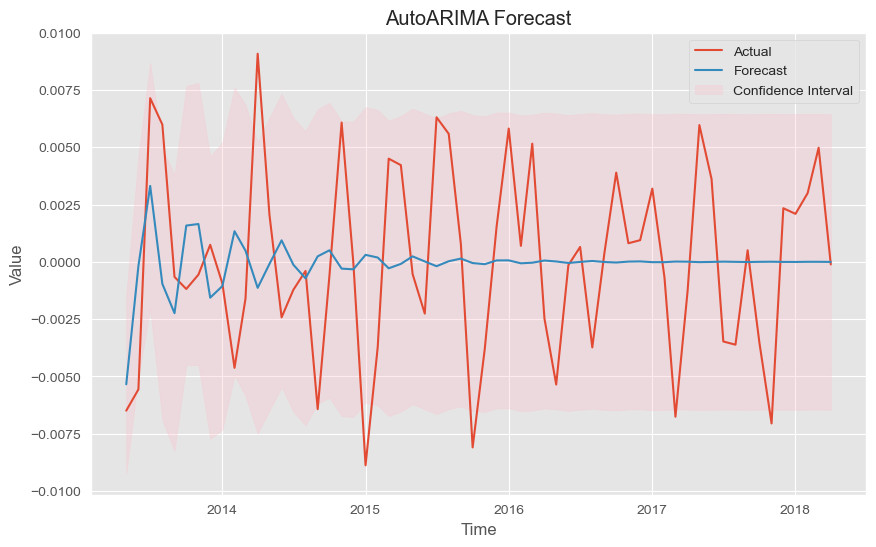

Mean Squared Error: 1.715545348115443e-05


In [ ]:
# Forecast future values
forecast_steps = len(test)  # Replace 'test' with the appropriate out-of-sample period
forecast, conf_int = stepwise_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AutoARIMA Forecast')
plt.legend()
plt.show()

# Calculate and print the model's performance metrics (optional)
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')


### SARIMA MODEL

In [ ]:
train = selected_data[:'2013-04']

print("Optimizing SARIMA Model\n" + "-" * 40)
# Use auto_arima to find the best SARIMA model
sarima_model = pm.auto_arima(train,
                             start_p=0, start_q=0, start_P=0, start_Q=0,
                             max_p=5, max_q=5, max_P=5, max_Q=5,
                             seasonal=True, m=12,  # Using 12 assuming the data is monthly. Adjust if needed.
                             d=1, D=1,  # These can be adjusted based on the dataset's properties
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True, with_intercept=False)
# Print the summary of the best model
print(sarima_model.summary())
print("-" * 50)

Optimizing SARIMA Model
----------------------------------------
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1338.467, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1345.311, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-1382.618, Time=0.63 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1338.109, Time=0.37 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-1360.659, Time=0.75 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=5.61 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-1346.615, Time=0.48 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-1383.476, Time=0.50 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-1361.608, Time=0.40 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=4.53 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-1347.337, Time=0.40 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-1406.632, Time=7.59 sec
 ARIMA(0,1,0)(2,1,2)[12]  

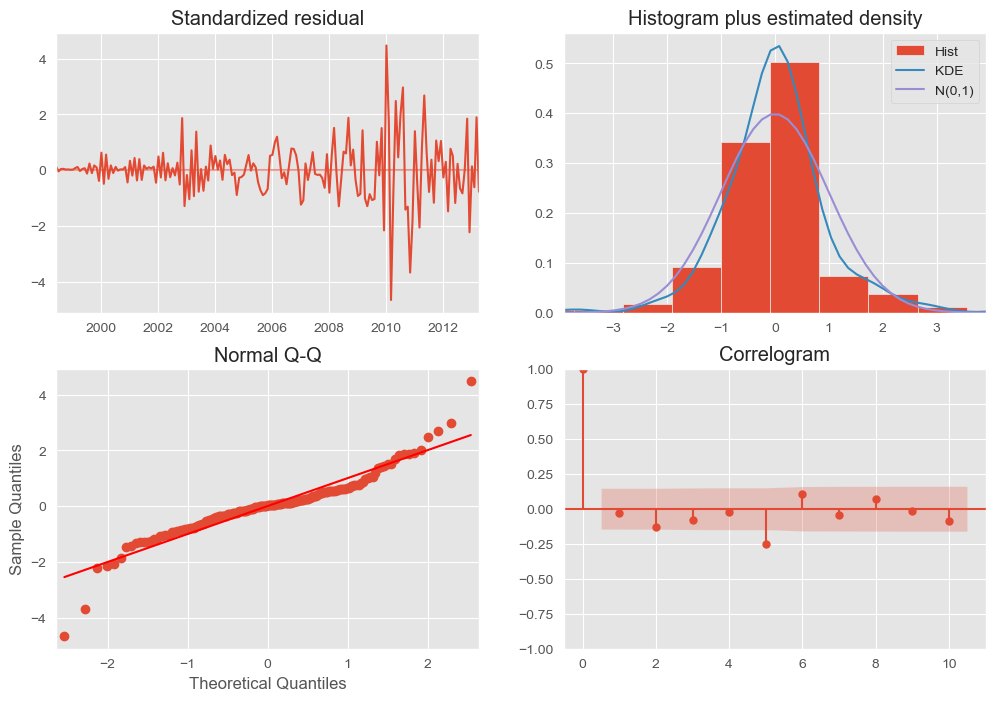

In [ ]:
sarima_model.plot_diagnostics(figsize=(12, 8))
plt.show()

In [ ]:
# Use get_prediction method to get forecasted values and confidence intervals
forecast = fitted_model.get_prediction(start=len(region_subset), end=len(region_subset) + 35, dynamic=False)

# Extract the forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a DataFrame with the forecasted values and confidence intervals
forecast_df = pd.DataFrame({
    'lower': confidence_intervals.iloc[:, 0],
    'upper': confidence_intervals.iloc[:, 1],
    'prediction': forecasted_values
})

# Print or use the forecasted values in forecast_df
print(forecast_df)


               lower     upper  prediction
2018-05-01 -0.012304  0.011803   -0.000251
2018-06-01 -0.012373  0.011872   -0.000251
2018-07-01 -0.012441  0.011940   -0.000251
2018-08-01 -0.012509  0.012008   -0.000251
2018-09-01 -0.012577  0.012075   -0.000251
2018-10-01 -0.012644  0.012142   -0.000251
2018-11-01 -0.012710  0.012209   -0.000251
2018-12-01 -0.012777  0.012276   -0.000251
2019-01-01 -0.012843  0.012342   -0.000251
2019-02-01 -0.012908  0.012407   -0.000251
2019-03-01 -0.012974  0.012473   -0.000251
2019-04-01 -0.013039  0.012538   -0.000251
2019-05-01 -0.013103  0.012602   -0.000251
2019-06-01 -0.013168  0.012667   -0.000251
2019-07-01 -0.013232  0.012731   -0.000251
2019-08-01 -0.013296  0.012794   -0.000251
2019-09-01 -0.013359  0.012858   -0.000251
2019-10-01 -0.013422  0.012921   -0.000251
2019-11-01 -0.013485  0.012984   -0.000251
2019-12-01 -0.013547  0.013046   -0.000251
2020-01-01 -0.013610  0.013109   -0.000251
2020-02-01 -0.013672  0.013170   -0.000251
2020-03-01 

NameError: name 'future_prediction' is not defined

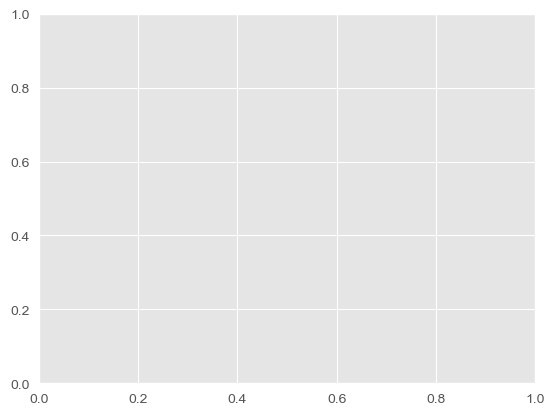

In [ ]:
# Plotting our Forecast

fig, ax = plt.subplots()

# Replace 'recent_series' with the correct series or data you want to plot
# recent_series.plot(ax=ax, label='values')

# Plot your forecasted values from 'future_prediction' DataFrame
future_prediction['prediction'].plot(ax=ax, label='predicted value', ls='--')

# Fill the confidence interval
ax.fill_between(x=future_prediction.index, y1=future_prediction['lower'], y2=future_prediction['upper'], color='lightpink')

# Add labels and title
plt.ylabel("Average Price")
plt.title("Average Home Price - 33126 - With Forecasted Value & Confidence Intervals")

# Add a legend
ax.legend()

# Show the plot
plt.show()


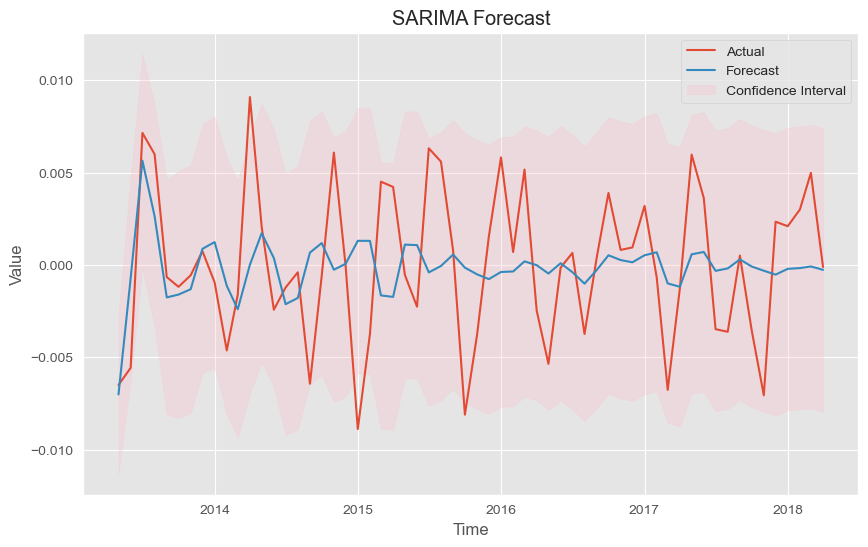

Mean Squared Error: 1.5663783572046395e-05


In [ ]:
# Forecast future values
forecast_steps = len(test)  # Replace 'test' with the appropriate out-of-sample period
forecast, conf_int = sarima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# Calculate and print the model's performance metrics (optional)
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

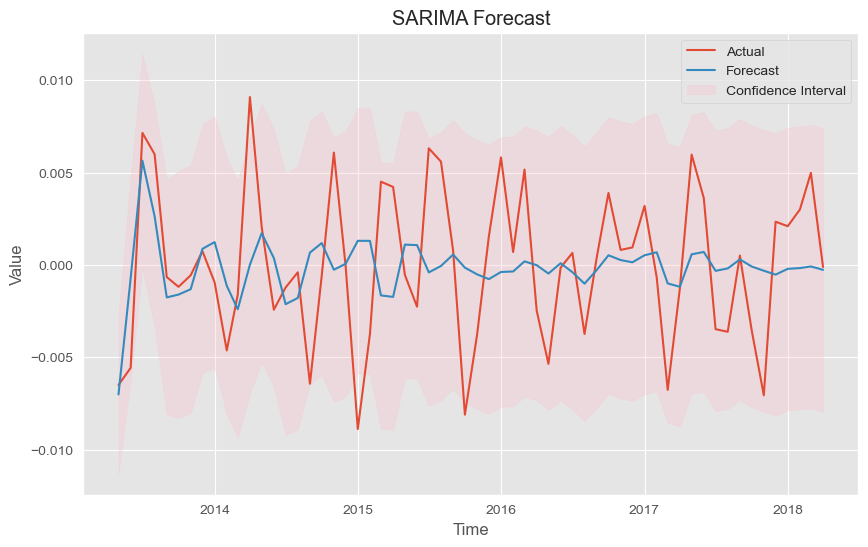

In [ ]:
# Forecast future values

forecast_steps = len(test)

forecast, conf_int = sarima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Plot the original data and the forecast

plt.figure(figsize=(10, 6))

plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
# Forecast future values
forecast_steps = len(test)
forecast, conf_int = sarima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# 'forecast' contains the predicted values for the test period
# 'conf_int' contains the lower and upper confidence intervals for each prediction

# Example: Print the first few forecasted values and their confidence intervals
for i in range(5):
    print(f"Forecast at step {i + 1}: {forecast[i]:.2f}")
    print(f"Confidence Interval at step {i + 1}: [{conf_int[i, 0]:.2f}, {conf_int[i, 1]:.2f}]")

# You can interpret the results as follows:
# - 'forecast' provides the point estimates of future values.
# - 'conf_int' gives the range within which the actual values are likely to fall with a certain confidence level.
# - For example, if the confidence interval is [10, 20], it means we are 95% confident that the actual value will be between 10 and 20.


Forecast at step 1: -0.01
Confidence Interval at step 1: [-0.01, -0.00]
Forecast at step 2: -0.00
Confidence Interval at step 2: [-0.01, 0.00]
Forecast at step 3: 0.01
Confidence Interval at step 3: [-0.00, 0.01]
Forecast at step 4: 0.00
Confidence Interval at step 4: [-0.00, 0.01]
Forecast at step 5: -0.00
Confidence Interval at step 5: [-0.01, 0.00]


TypeError: float() argument must be a string or a number, not 'PredictionResultsWrapper'

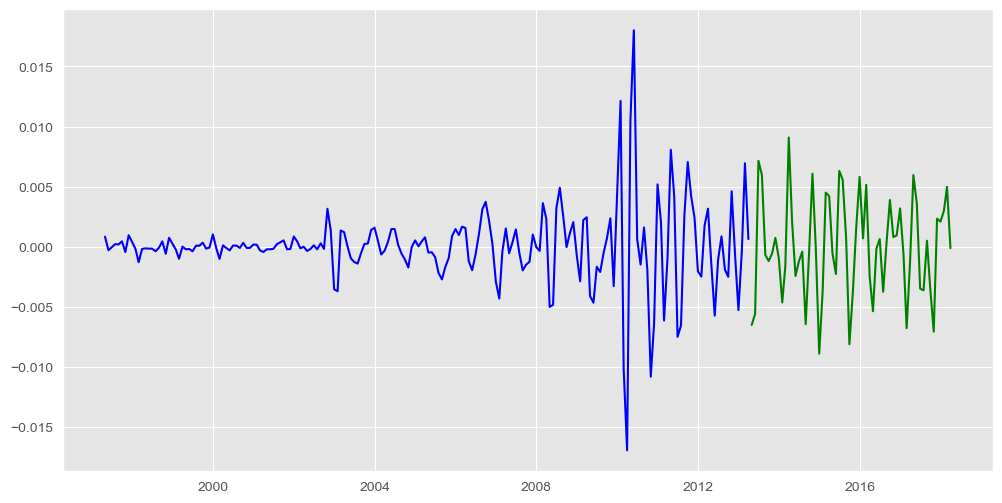

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert forecast array to a pandas Series with the test data's index
forecast_series = pd.Series(forecast, index=test.index)

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')

# Plot the forecasted values
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')

# Fill the confidence interval
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()





# conclusion